## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import anderson
from datetime import datetime
from collections import Counter
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")

In [2]:
#defining functions
def anderson_test(data):
    result = anderson(data)
    print('Statistic: %.3f' % result.statistic)
    p = 0
    for i in range(len(result.critical_values)):
        sl, cv = result.significance_level[i], result.critical_values[i]
        if result.statistic < result.critical_values[i]:
            print('%.3f: %.3f, distribution is normal at this significance level' % (sl, cv))
        else:
            print('%.3f: %.3f, distributiom is not normal at this significance level' % (sl, cv))




In [174]:
#extracting data from the csv file
table = pd.read_csv('./flights.csv')
table = table[['fl_date','arr_delay','dep_delay','weather_delay', 'dest_airport_id', 'taxi_in', 'taxi_out']]
table = table.reset_index(drop=True)
table['fl_date'] = pd.to_datetime(table['fl_date'])
table.to_csv('./table.csv', index=False)
table


,fl_date,arr_delay,dep_delay,weather_delay,dest_airport_id,taxi_in,taxi_out
0,2018-09-30,-29.0,-9.0,NaN,12478,9.0,10.0
1,2018-09-30,-21.0,-5.0,NaN,12478,7.0,15.0
2,2018-09-30,-11.0,-7.0,NaN,13871,5.0,20.0
3,2018-09-30,-49.0,-6.0,NaN,12478,18.0,14.0
4,2018-09-30,53.0,55.0,0.0,12478,31.0,20.0
...,...,...,...,...,...,...,...
15927480,2018-09-30,48.0,57.0,0.0,12478,9.0,20.0
15927481,2018-09-30,34.0,44.0,0.0,12451,3.0,36.0
15927482,2018-09-30,-19.0,-7.0,NaN,12953,7.0,13.0
15927483,2018-09-30,-21.0,-8.0,NaN,12478,6.0,13.0


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [175]:
message = pd.read_csv('./table.csv')
message = message[['fl_date','arr_delay','dep_delay']]
message = message.dropna()
message = message.reset_index(drop=True)

message

,fl_date,arr_delay,dep_delay
0,2018-09-30,-29.0,-9.0
1,2018-09-30,-21.0,-5.0
2,2018-09-30,-11.0,-7.0
3,2018-09-30,-49.0,-6.0
4,2018-09-30,53.0,55.0
...,...,...,...
15611147,2018-09-30,48.0,57.0
15611148,2018-09-30,34.0,44.0
15611149,2018-09-30,-19.0,-7.0
15611150,2018-09-30,-21.0,-8.0


In [176]:
#testing balance of delays and early arrivals/depatures around 0
arr_pos = message['arr_delay'][(message.arr_delay >= 0) & (message.arr_delay <= 120)]
arr_neg = message['arr_delay'][(message.dep_delay <= 0) & (message.dep_delay >= -120)]
dep_pos = message['dep_delay'][(message.dep_delay >= 0) & (message.dep_delay <= 120)]
dep_neg = message['dep_delay'][(message.dep_delay <= 0) & (message.dep_delay >= -120)]

(arr_pos.count(), arr_neg.count(), dep_pos.count(), dep_neg.count())


(5368246, 10295458, 5683087, 10295458)

In [177]:
#Testing using anderson test 
arrivals = message['arr_delay'][(message.arr_delay >= -120) & (message.arr_delay <= 120)]
departures = message['dep_delay'][(message.dep_delay >= -120) & (message.dep_delay <= 120)]

print('Arrivals')
anderson_test(arrivals)
print('Departures')
anderson_test(departures)


Arrivals
Statistic: 753543.655
15.000: 0.576, distributiom is not normal at this significance level
10.000: 0.656, distributiom is not normal at this significance level
5.000: 0.787, distributiom is not normal at this significance level
2.500: 0.918, distributiom is not normal at this significance level
1.000: 1.092, distributiom is not normal at this significance level
Departures
Statistic: 1835819.494
15.000: 0.576, distributiom is not normal at this significance level
10.000: 0.656, distributiom is not normal at this significance level
5.000: 0.787, distributiom is not normal at this significance level
2.500: 0.918, distributiom is not normal at this significance level
1.000: 1.092, distributiom is not normal at this significance level


In [178]:
#testting early arrivals/departures and delays separately
arr_pos = message['arr_delay'][(message.arr_delay >= 0) & (message.arr_delay <= 120)]
arr_neg = message['arr_delay'][(message.dep_delay <= 0) & (message.dep_delay >= -120)]
dep_pos = message['dep_delay'][(message.dep_delay >= 0) & (message.dep_delay <= 120)]
dep_neg = message['dep_delay'][(message.dep_delay <= 0) & (message.dep_delay >= -120)]

print('Early arrivals')
anderson_test(arr_neg)
print('Arrivals delay')
anderson_test(arr_pos)

print('Early departures')
anderson_test(dep_neg)
print(' Departures delay')
anderson_test(dep_pos)



Early arrivals
Statistic: 92395.608
15.000: 0.576, distributiom is not normal at this significance level
10.000: 0.656, distributiom is not normal at this significance level
5.000: 0.787, distributiom is not normal at this significance level
2.500: 0.918, distributiom is not normal at this significance level
1.000: 1.092, distributiom is not normal at this significance level
Arrivals delay
Statistic: 349090.452
15.000: 0.576, distributiom is not normal at this significance level
10.000: 0.656, distributiom is not normal at this significance level
5.000: 0.787, distributiom is not normal at this significance level
2.500: 0.918, distributiom is not normal at this significance level
1.000: 1.092, distributiom is not normal at this significance level
Early departures
Statistic: 123370.584
15.000: 0.576, distributiom is not normal at this significance level
10.000: 0.656, distributiom is not normal at this significance level
5.000: 0.787, distributiom is not normal at this significance leve

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [179]:
message = pd.read_csv('./table.csv')
message = message[['fl_date','arr_delay','dep_delay']]
message = message.dropna()
message = message.reset_index(drop=True)

message

,fl_date,arr_delay,dep_delay
0,2018-09-30,-29.0,-9.0
1,2018-09-30,-21.0,-5.0
2,2018-09-30,-11.0,-7.0
3,2018-09-30,-49.0,-6.0
4,2018-09-30,53.0,55.0
...,...,...,...
15611147,2018-09-30,48.0,57.0
15611148,2018-09-30,34.0,44.0
15611149,2018-09-30,-19.0,-7.0
15611150,2018-09-30,-21.0,-8.0


(array([17622., 17713., 17805., 17897., 17987., 18078., 18170.]),
 [Text(17622.0, 0, '2018-04'),
  Text(17713.0, 0, '2018-07'),
  Text(17805.0, 0, '2018-10'),
  Text(17897.0, 0, '2019-01'),
  Text(17987.0, 0, '2019-04'),
  Text(18078.0, 0, '2019-07'),
  Text(18170.0, 0, '2019-10')])

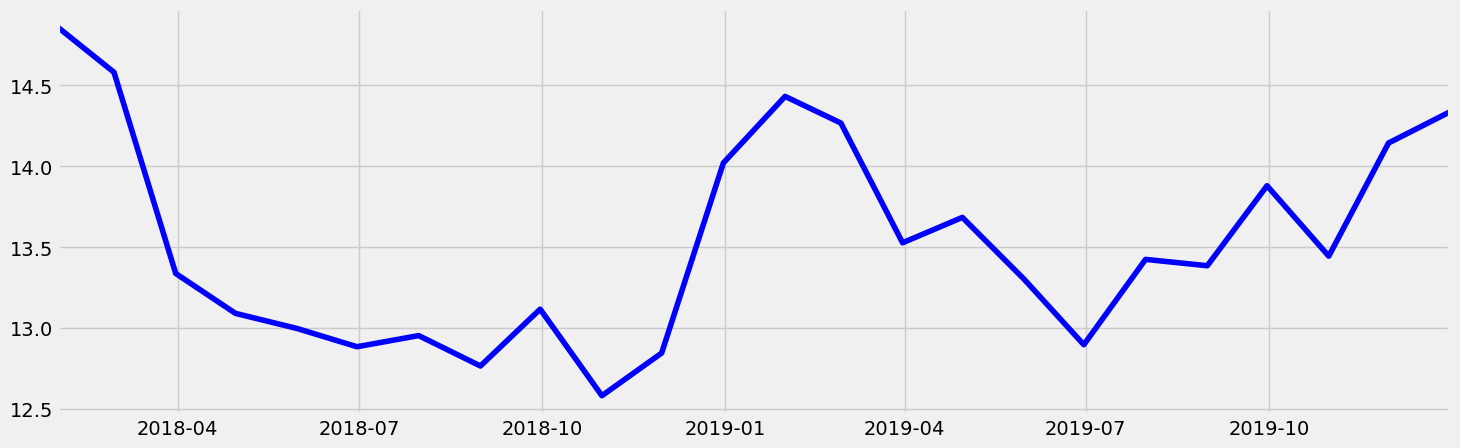

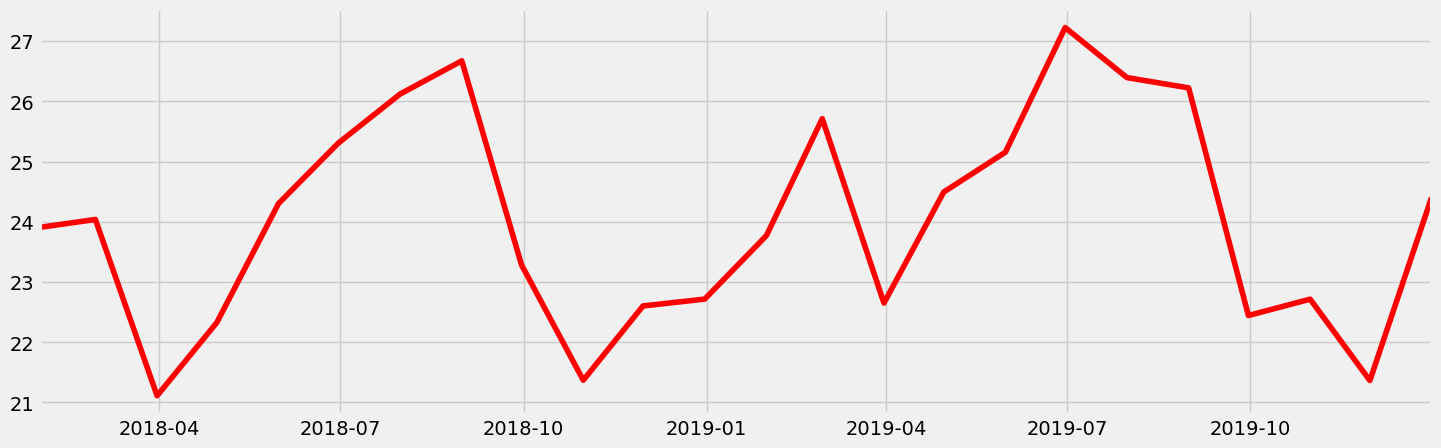

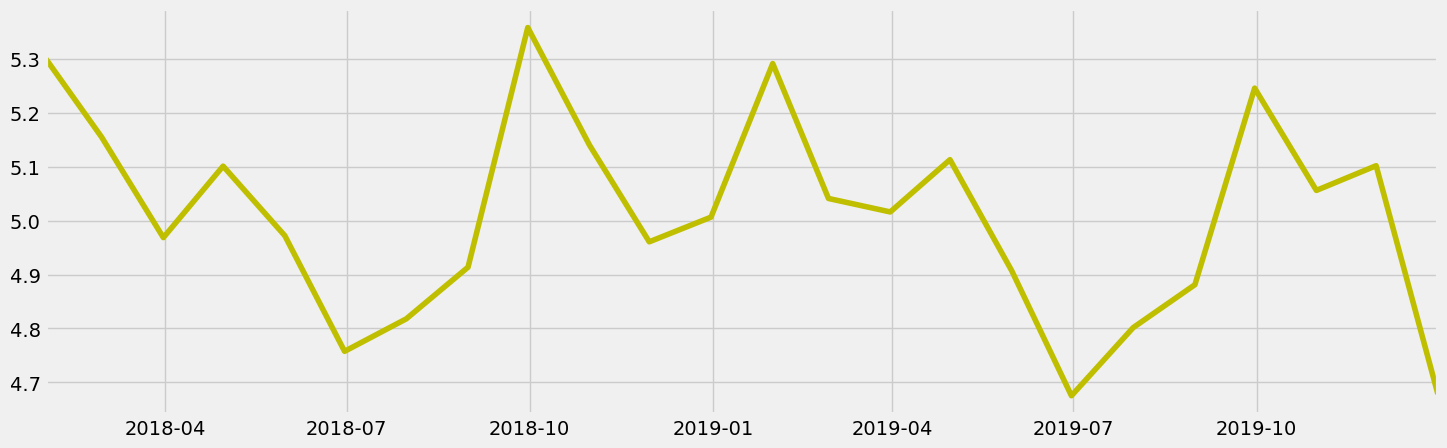

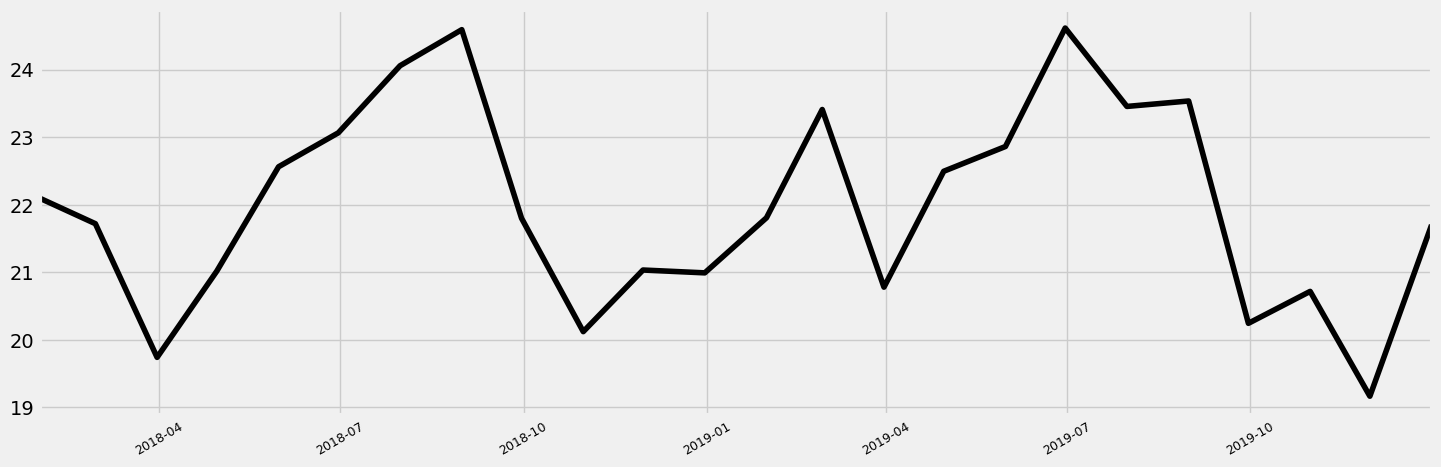

In [180]:
#average
message['fl_date'] = pd.to_datetime(message['fl_date'])
arr_pos = message[['fl_date','arr_delay']][(message.arr_delay >= 0) & (message.arr_delay <= 120)]
arr_neg = message[['fl_date','arr_delay']][(message.dep_delay <= 0) & (message.dep_delay >= -120)]
arr_neg['arr_delay'] = arr_neg['arr_delay'].abs()
dep_pos = message[['fl_date','dep_delay']][(message.dep_delay >= 0) & (message.dep_delay <= 120)]
dep_neg = message[['fl_date','dep_delay']][(message.dep_delay <= 0) & (message.dep_delay >= -120)]
dep_neg['dep_delay'] = dep_neg['dep_delay'].abs()

agg_early_arr = arr_neg.groupby(pd.Grouper(key='fl_date', freq='1M')).mean()
agg_delay_arr = arr_pos.groupby(pd.Grouper(key='fl_date', freq='1M')).mean()
agg_early_dep = dep_neg.groupby(pd.Grouper(key='fl_date', freq='1M')).mean()
agg_delay_dep = dep_pos.groupby(pd.Grouper(key='fl_date', freq='1M')).mean()

fig = plt.subplots(figsize=(16, 5))
plt.plot(agg_early_arr.index, agg_early_arr['arr_delay'], color='b')    
plt.xlim(agg_early_arr.index.min(), agg_early_arr.index.max())

fig = plt.subplots(figsize=(16, 5))
plt.plot(agg_delay_arr.index, agg_delay_arr['arr_delay'], color='r')    
plt.xlim(agg_delay_arr.index.min(), agg_delay_arr.index.max())

fig = plt.subplots(figsize=(16, 5))
plt.plot(agg_early_dep.index, agg_early_dep['dep_delay'], color='y')    
plt.xlim(agg_early_dep.index.min(), agg_early_dep.index.max())

fig = plt.subplots(figsize=(16, 5))
plt.plot(agg_delay_dep.index, agg_delay_dep['dep_delay'], color='k')    
plt.xlim(agg_delay_dep.index.min(), agg_delay_dep.index.max())

plt.xticks(rotation=30, fontsize=9)

(array([17622., 17713., 17805., 17897., 17987., 18078., 18170.]),
 [Text(17622.0, 0, '2018-04'),
  Text(17713.0, 0, '2018-07'),
  Text(17805.0, 0, '2018-10'),
  Text(17897.0, 0, '2019-01'),
  Text(17987.0, 0, '2019-04'),
  Text(18078.0, 0, '2019-07'),
  Text(18170.0, 0, '2019-10')])

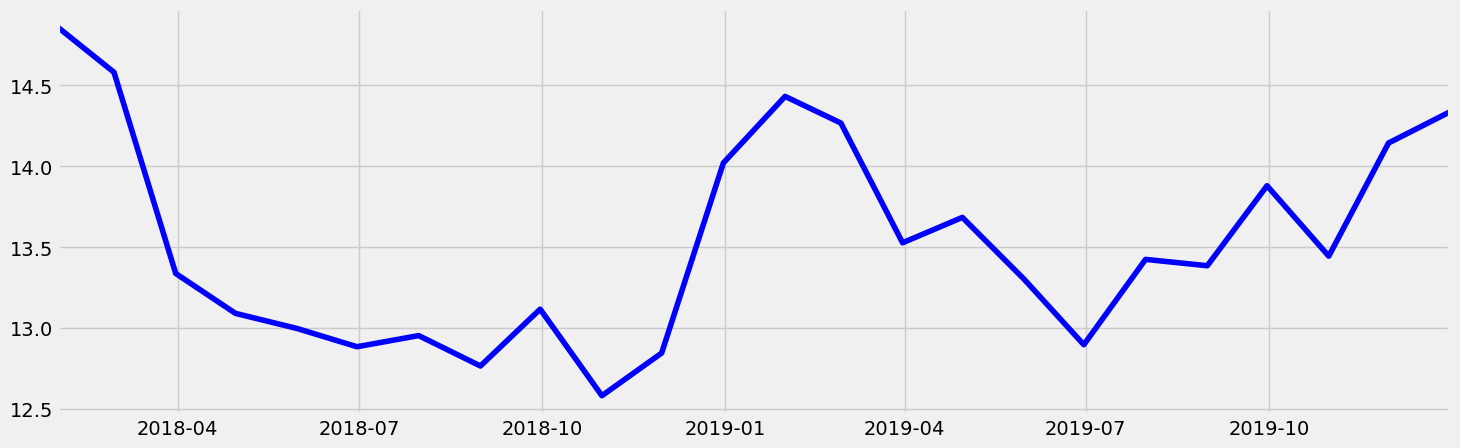

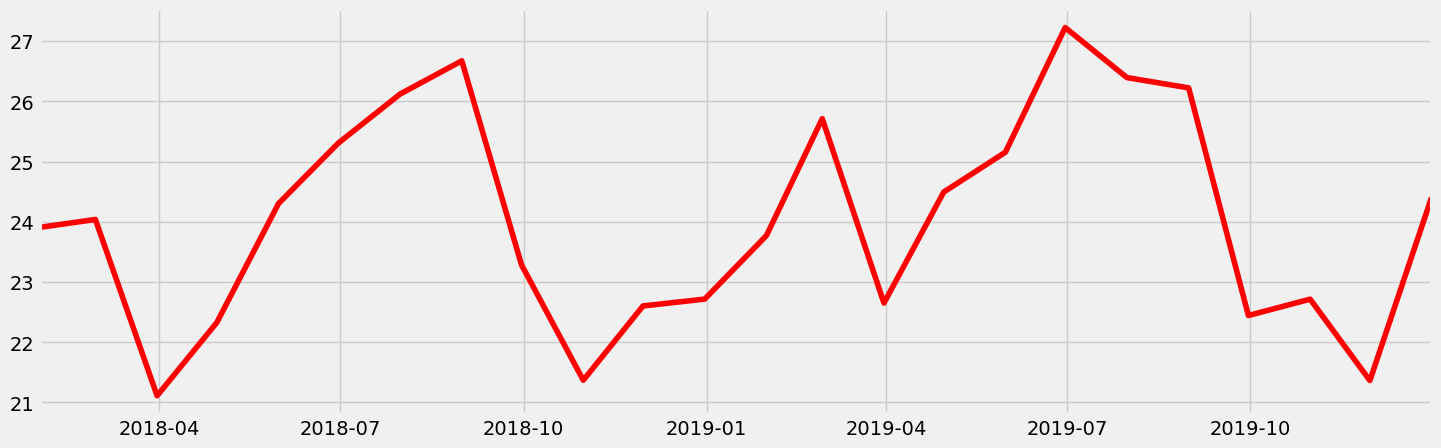

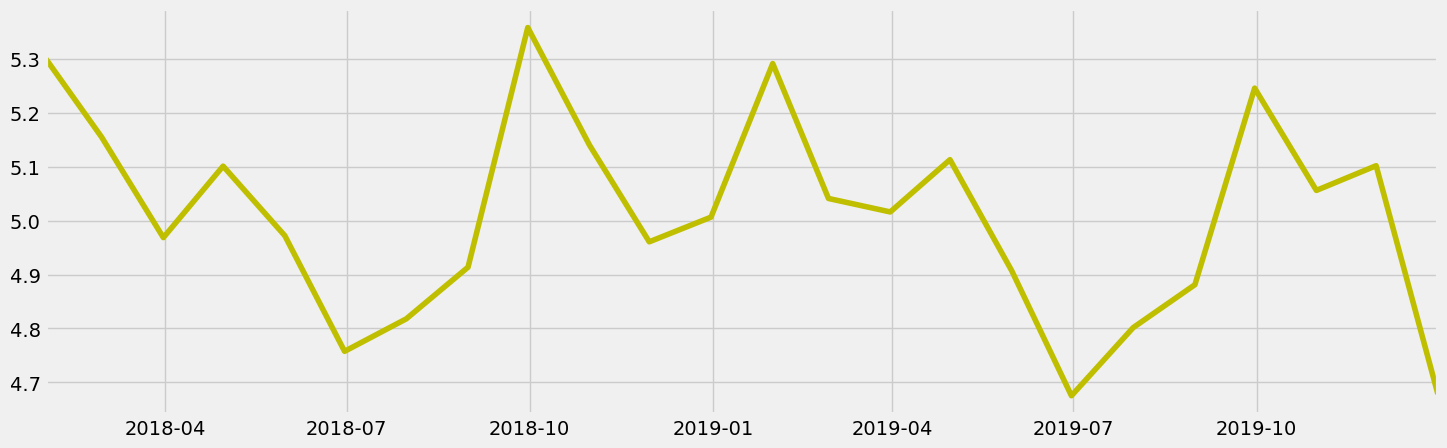

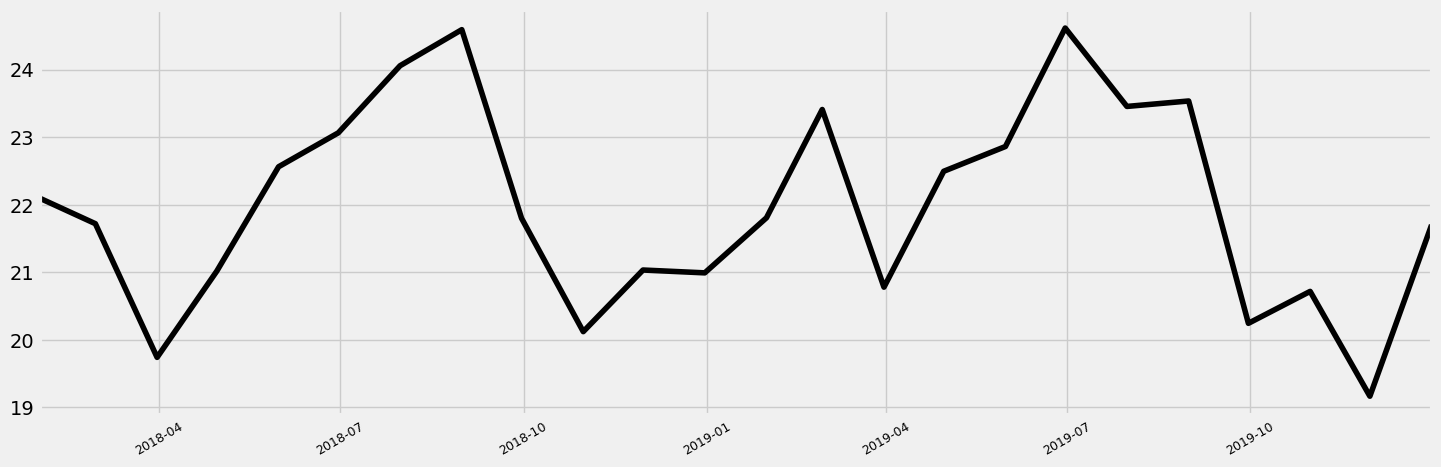

In [181]:
#median
arr_pos = message[['fl_date','arr_delay']][(message.arr_delay >= 0) & (message.arr_delay <= 120)]
arr_neg = message[['fl_date','arr_delay']][(message.dep_delay <= 0) & (message.dep_delay >= -120)]
arr_neg['arr_delay'] = arr_neg['arr_delay'].abs()
dep_pos = message[['fl_date','dep_delay']][(message.dep_delay >= 0) & (message.dep_delay <= 120)]
dep_neg = message[['fl_date','dep_delay']][(message.dep_delay <= 0) & (message.dep_delay >= -120)]
dep_neg['dep_delay'] = dep_neg['dep_delay'].abs()

agg_early_arr = arr_neg.groupby(pd.Grouper(key='fl_date', freq='1M')).mean()
agg_delay_arr = arr_pos.groupby(pd.Grouper(key='fl_date', freq='1M')).mean()
agg_early_dep = dep_neg.groupby(pd.Grouper(key='fl_date', freq='1M')).mean()
agg_delay_dep = dep_pos.groupby(pd.Grouper(key='fl_date', freq='1M')).mean()

fig = plt.subplots(figsize=(16, 5))
plt.plot(agg_early_arr.index, agg_early_arr['arr_delay'], color='b')    
plt.xlim(agg_early_arr.index.min(), agg_early_arr.index.max())

fig = plt.subplots(figsize=(16, 5))
plt.plot(agg_delay_arr.index, agg_delay_arr['arr_delay'], color='r')    
plt.xlim(agg_delay_arr.index.min(), agg_delay_arr.index.max())

fig = plt.subplots(figsize=(16, 5))
plt.plot(agg_early_dep.index, agg_early_dep['dep_delay'], color='y')    
plt.xlim(agg_early_dep.index.min(), agg_early_dep.index.max())

fig = plt.subplots(figsize=(16, 5))
plt.plot(agg_delay_dep.index, agg_delay_dep['dep_delay'], color='k')    
plt.xlim(agg_delay_dep.index.min(), agg_delay_dep.index.max())

plt.xticks(rotation=30, fontsize=9)

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [182]:
#getting data
message = pd.read_csv('./table.csv')
message.dropna(subset=['arr_delay'])

#counting all flights that arrived late
message['weather_delay'] = message['weather_delay'].fillna(0)
message = message[message.arr_delay > 0]

#groupping by date
daily_num_flight_delay_arr = message.groupby('fl_date') \
                   .agg(total_count=('arr_delay', 'size')) \
                   .reset_index()

daily_num_flight_delay_arr

,fl_date,total_count
0,2018-01-01,8832
1,2018-01-02,9679
2,2018-01-03,8436
3,2018-01-04,5443
4,2018-01-05,7640
...,...,...
725,2019-12-27,7555
726,2019-12-28,8897
727,2019-12-29,8943
728,2019-12-30,9370


In [183]:
#counting all flights arrival delay due to weather
daily_num_weather_impact  = message[message.weather_delay != 0]

#groupping by date
daily_num_weather_impact = daily_num_weather_impact.groupby('fl_date') \
                            .agg(total_weather_impact = ('arr_delay', 'size')) \
                            .reset_index()
                            
daily_num_weather_impact

,fl_date,total_weather_impact
0,2018-01-01,385
1,2018-01-02,485
2,2018-01-03,276
3,2018-01-04,244
4,2018-01-05,405
...,...,...
725,2019-12-27,81
726,2019-12-28,570
727,2019-12-29,301
728,2019-12-30,495


In [184]:
#daily percentage of flights arrival delay due to weather
weather_impact = pd.merge(daily_num_flight_delay_arr, daily_num_weather_impact, on='fl_date', how='inner')
weather_impact['percent_weather_impact'] = (weather_impact['total_weather_impact'] / weather_impact['total_count'])*100

weather_impact.sort_values(by='percent_weather_impact', ascending=False)


,fl_date,total_count,total_weather_impact,percent_weather_impact
16,2018-01-17,8840,1218,13.778281
495,2019-05-11,6009,615,10.234648
34,2018-02-04,7035,715,10.163468
318,2018-11-15,11753,1110,9.444397
415,2019-02-20,11175,1046,9.360179
...,...,...,...,...
470,2019-04-16,5230,17,0.325048
499,2019-05-15,5859,19,0.324287
100,2018-04-11,5907,17,0.287794
441,2019-03-18,5164,14,0.271108


(0.0, 729.0)

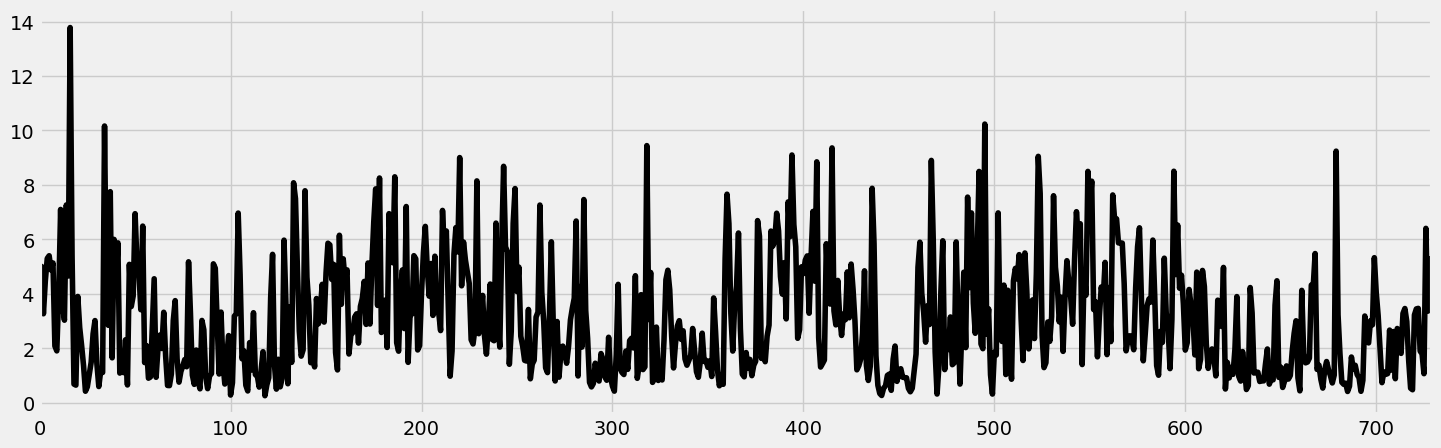

In [185]:
#ploting the percentage of flights arrival delay due to weather
fig = plt.subplots(figsize=(16, 5))
plt.plot(weather_impact.index, weather_impact['percent_weather_impact'], color='k')    
plt.xlim(weather_impact.index.min(), weather_impact.index.max())


#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [197]:
#extracting data
message = pd.read_csv('./table.csv')
message = message[['fl_date','dest_airport_id','taxi_out','taxi_in']]
message['total_taxi'] = message['taxi_out'] + message['taxi_in']
message = message[['fl_date','dest_airport_id','total_taxi']]

#cleaning data
message = message.dropna(subset=['total_taxi']).reset_index(drop=True)

message

,fl_date,dest_airport_id,total_taxi
0,2018-09-30,12478,19.0
1,2018-09-30,12478,22.0
2,2018-09-30,13871,25.0
3,2018-09-30,12478,32.0
4,2018-09-30,12478,51.0
...,...,...,...
15646306,2018-09-30,12478,29.0
15646307,2018-09-30,12451,39.0
15646308,2018-09-30,12953,20.0
15646309,2018-09-30,12478,19.0


In [198]:
#choosing the top 5 airports with the most trafic
Counter(message['dest_airport_id']).most_common(5)


[(10397, 781662),
 (13930, 767755),
 (11298, 571105),
 (11292, 543789),
 (12892, 495766)]

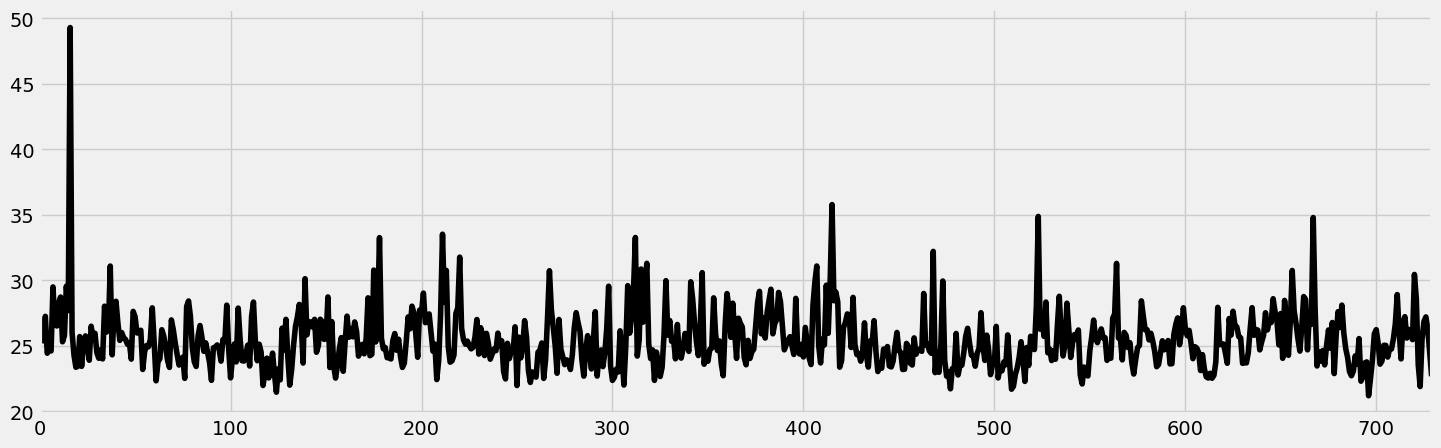

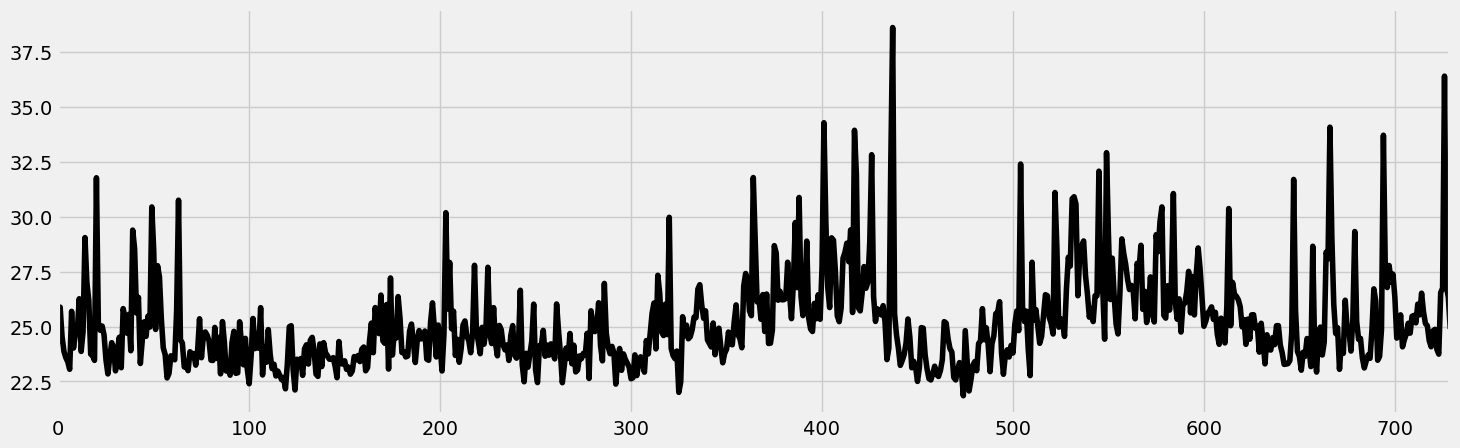

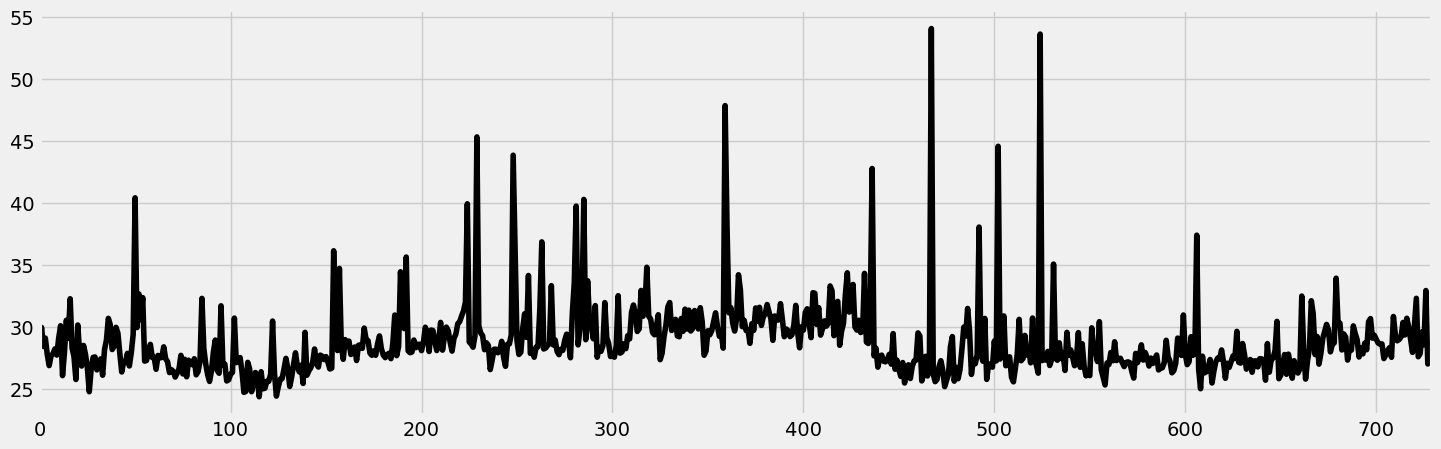

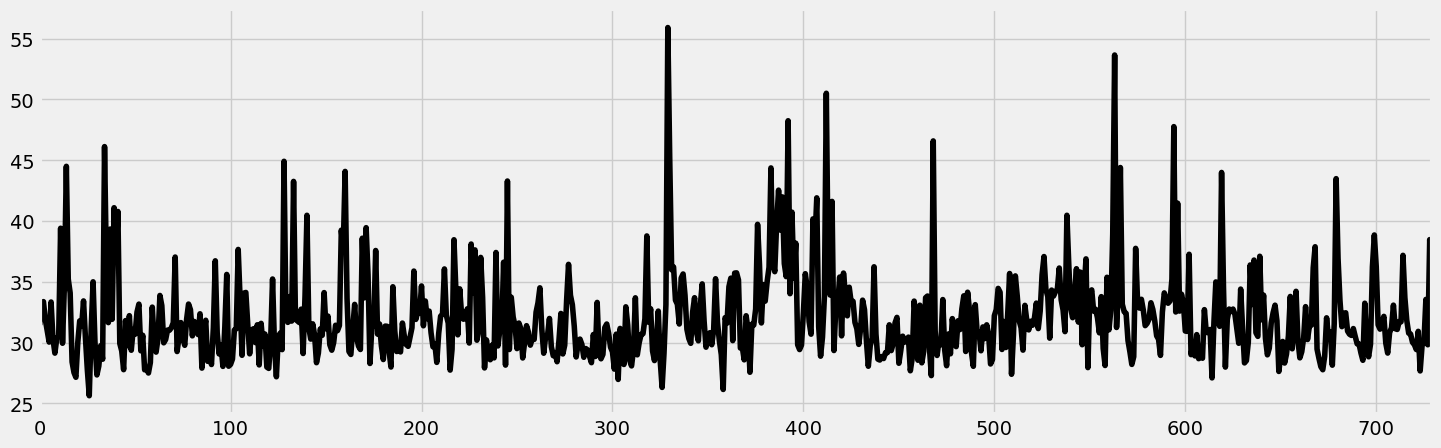

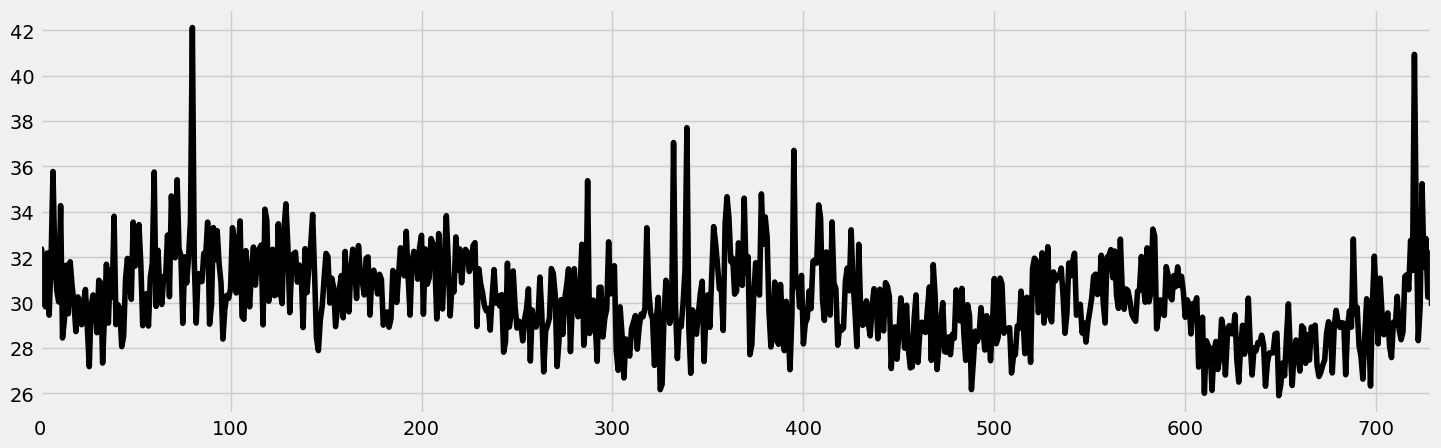

In [199]:
#ploting the evolution of the taxi time for the top 5 airports
list_airport = [10397, 11292, 11298, 13930, 12892]
for i in list_airport:
    airport = message[message.dest_airport_id == i]
    airport = airport.groupby('fl_date') \
                .agg(fl_count=('total_taxi', 'size'), taxi_time_mean =('total_taxi', 'mean')) \
                .reset_index()

    fig = plt.subplots(figsize=(16, 5))
    plt.plot(airport.index, airport['taxi_time_mean'], color='k')    
    plt.xlim(airport.index.min(), airport.index.max())


In [202]:
#checking the correlation between taxi time and trafic
count = 0
for i in set(message['dest_airport_id']):
    airport = message[message.dest_airport_id == i]
    airport = airport.groupby('fl_date') \
                .agg(fl_count=('total_taxi', 'size'), taxi_time_mean =('total_taxi', 'mean')) \
                .reset_index()
    result = pearsonr(airport['fl_count'], airport['taxi_time_mean'])
    if result[1] > 0.5:
        count += 1

print('percentage of airports where taxi time and trafic are correlated(alpha=0.5): ', count/len(set(message['dest_airport_id']))*100, '%')



percentage of airports where taxi time and trafic are correlated(alpha=0.5):  11.96808510638298 %


#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [195]:
#extracting data
message = pd.read_csv('./table.csv')

total = message[message.arr_delay >= 0]

arr_dep = total[total.dep_delay > 0]
print('percentenage of arrival delays caused by departure delays: ', (len(arr_dep)/len(total))*100)

arr_compensated = arr_dep[arr_dep.dep_delay > arr_dep.arr_delay]
print('percentenage of arrival delays caused by departure delays and compensated during flight: ', (len(arr_compensated)/len(arr_dep))*100)                                                                           

arr_compensated['percentage'] = (arr_compensated['dep_delay'] - arr_compensated['arr_delay'])/arr_compensated['dep_delay'] 
print('average percentage of departure delays time compensated: ', arr_compensated['percentage'].mean()*100)



percentenage of arrival delays caused by departure delays:  69.39275914986592
percentenage of arrival delays caused by departure delays and compensated during flight:  60.531150981030294
average percentage of departure delays time compensated:  35.42184646608283


#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?